In [1]:
import os
os.chdir('../')

In [2]:
from dtd import autopatch
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

plt.style.use('ggplot')

In [3]:
from project.config import DATA_FOLDER

In [4]:
list(Path(DATA_FOLDER).iterdir())

[PosixPath('data/101_ObjectCategories/gerenuk'),
 PosixPath('data/101_ObjectCategories/hawksbill'),
 PosixPath('data/101_ObjectCategories/headphone'),
 PosixPath('data/101_ObjectCategories/ant'),
 PosixPath('data/101_ObjectCategories/butterfly'),
 PosixPath('data/101_ObjectCategories/lamp'),
 PosixPath('data/101_ObjectCategories/strawberry'),
 PosixPath('data/101_ObjectCategories/water_lilly'),
 PosixPath('data/101_ObjectCategories/chandelier'),
 PosixPath('data/101_ObjectCategories/dragonfly'),
 PosixPath('data/101_ObjectCategories/crab'),
 PosixPath('data/101_ObjectCategories/pagoda'),
 PosixPath('data/101_ObjectCategories/dollar_bill'),
 PosixPath('data/101_ObjectCategories/emu'),
 PosixPath('data/101_ObjectCategories/inline_skate'),
 PosixPath('data/101_ObjectCategories/platypus'),
 PosixPath('data/101_ObjectCategories/dalmatian'),
 PosixPath('data/101_ObjectCategories/cup'),
 PosixPath('data/101_ObjectCategories/airplanes'),
 PosixPath('data/101_ObjectCategories/joshua_tree'),
 Po

In [5]:
len(list(Path(DATA_FOLDER).iterdir()))

102

### Distribution of images across classes

In [6]:
background_class = "BACKGROUND_Google"

In [7]:
all_classes_path = list(filter(lambda x: x.name != background_class, Path(DATA_FOLDER).iterdir()))

In [8]:
assert len(all_classes_path) == 101

In [9]:
Path(DATA_FOLDER) / background_class

PosixPath('data/101_ObjectCategories/BACKGROUND_Google')

In [10]:
len(list((Path(DATA_FOLDER) / background_class).iterdir()))

468

## total background images 468

In [11]:
all_classes_size = [(class_path.name, len(list(class_path.iterdir()))) for class_path in all_classes_path]

In [12]:
all_classes_size = sorted(all_classes_size, key=lambda x: -x[1])

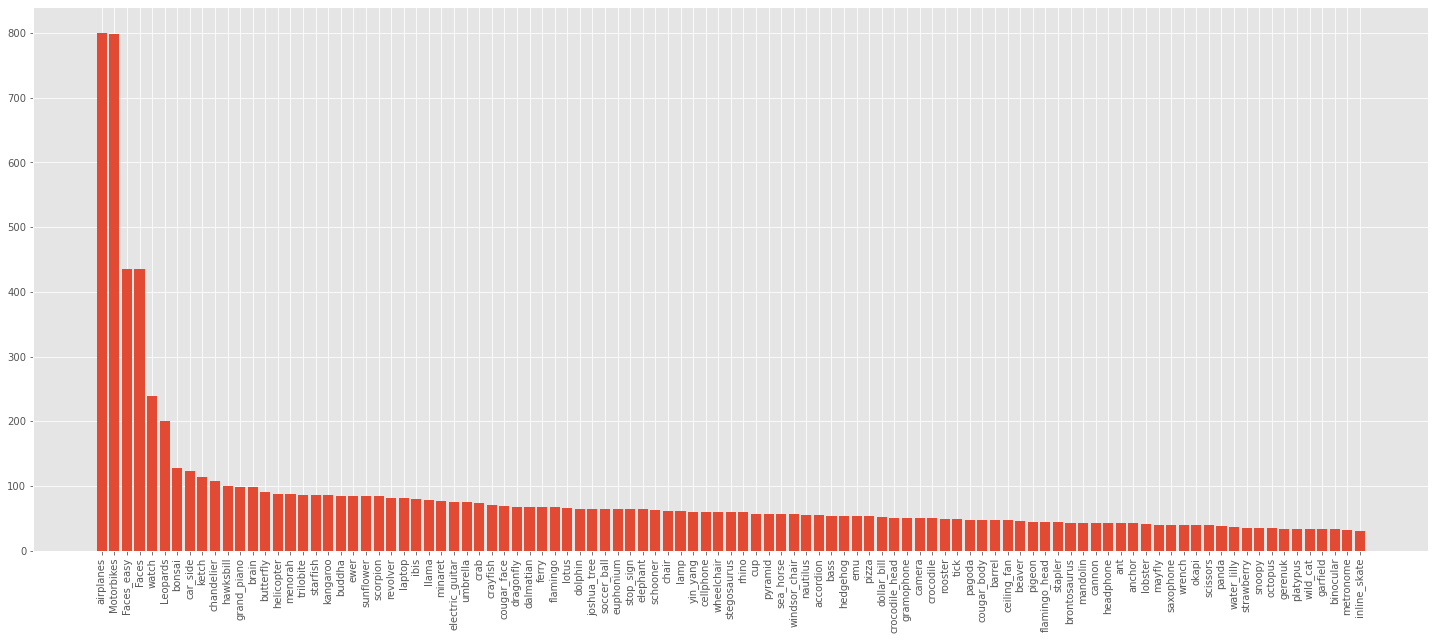

In [13]:
plt.figure(figsize=(25,10))
plt.bar([x[0] for x in all_classes_size], [x[1] for x in all_classes_size])
plt.xticks(rotation=90)
# plt.show()
plt.savefig('images/class_distribution.eps', format='eps')


In [14]:
# total images in dataset
sum(x[1] for x in all_classes_size)

8677

In [15]:
# total images in dataset in top 5 classes
sum(x[1] for x in all_classes_size[:5])

2707

In [16]:
# 5% of top classes contains 30% of data 
2707/8677

0.31197418462602283

In [17]:
### Helper function for grid plot

def read_image(image_path: Path):
    """
    Returns image in RGB format
    """
    img = cv2.imread(str(image_path))
    if img is not None:
        img = img[:, :, ::-1]
    return img

In [18]:
random_sample_paths = [random.choices(list(x.iterdir()), k=5) for x in random.choices(all_classes_path, k=5)]

Faces
dalmatian
crab
dragonfly
car_side


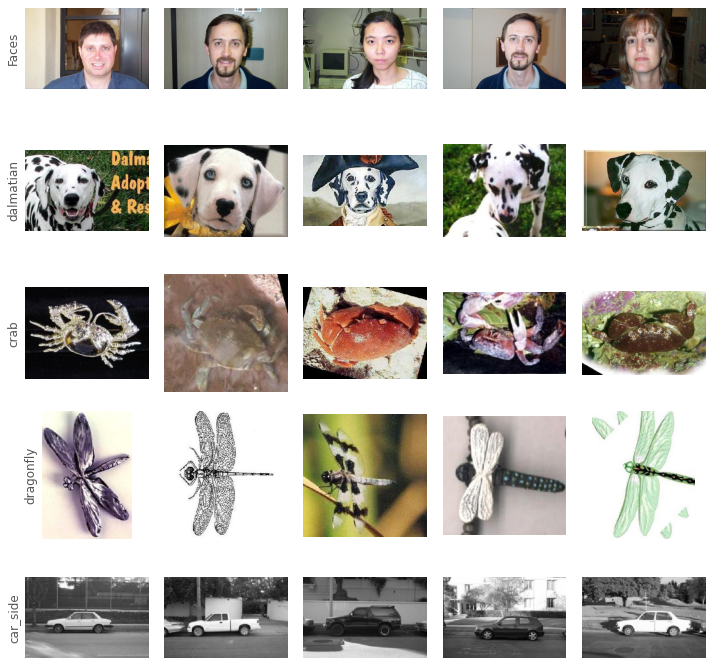

In [20]:
fig, axarr = plt.subplots(5,5, figsize=(10,10))
for i, each_class in enumerate(random_sample_paths):
    class_name = each_class[0].parent.name
    print(class_name)
    for j, image_path in enumerate(each_class):
        axarr[i, j].imshow(read_image(image_path))
        axarr[i, j].xaxis.set_ticklabels([])
        axarr[i, j].yaxis.set_ticklabels([])
        axarr[i, j].xaxis.set_ticks([])
        axarr[i, j].yaxis.set_ticks([])
        if j==0:
            axarr[i, j].set_ylabel(class_name, size='large')
            axarr[i, j].yaxis.get_label().set_visible(True)
fig.tight_layout()
# plt.show()
plt.savefig('images/data_sample3.jpg')

In [21]:
all_images_sizes = [read_image(image_path).shape[:2] for class_path in all_classes_path for image_path in class_path.iterdir()]

In [22]:
all_images_sizes[:20]

[(188, 300),
 (225, 300),
 (200, 300),
 (167, 300),
 (300, 294),
 (300, 265),
 (222, 300),
 (300, 253),
 (300, 253),
 (211, 300),
 (300, 273),
 (300, 298),
 (223, 300),
 (176, 300),
 (225, 300),
 (279, 300),
 (300, 198),
 (153, 300),
 (180, 300),
 (300, 261)]

In [23]:
all_images_aspect_ratio = [x[0]/x[1] for x in all_images_sizes]

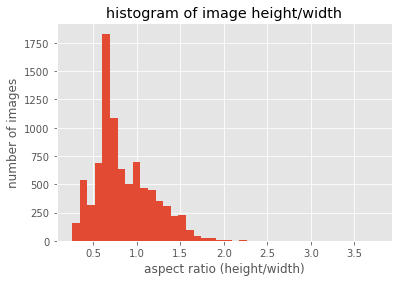

In [24]:
plt.hist(all_images_aspect_ratio, bins=40)
plt.title('histogram of image height/width')
plt.ylabel("number of images")
plt.xlabel("aspect ratio (height/width)")
plt.savefig('images/aspect_ratio_hist.png')

In [25]:
def is_image_grayscale(image):
    return np.all(np.logical_and(image[:,:,0] == image[:,:,1], image[:,:,1] == image[:,:,2]))

In [26]:
image = (read_image('data/101_ObjectCategories/accordion/image_0001.jpg'))

In [27]:
all_images_is_grayscale = [[is_image_grayscale(read_image(image_path)) for image_path in class_path.iterdir()] for class_path in all_classes_path ]

In [28]:
sum([y for x in all_images_is_grayscale for y in x])

411

In [29]:
all_classes_grayscale = []
for class_name, is_grayscale in zip(all_classes_path, all_images_is_grayscale):
    all_classes_grayscale.append((class_name.name, sum(is_grayscale), sum(x==False for x in is_grayscale)))

In [30]:
all_classes_grayscale = sorted(all_classes_grayscale, key=lambda x: -sum(x[1:]))

In [50]:
list(map(lambda x: sum(x[1:]), all_classes_grayscale))

[800,
 798,
 435,
 435,
 239,
 200,
 128,
 123,
 114,
 107,
 100,
 99,
 98,
 91,
 88,
 87,
 86,
 86,
 86,
 85,
 85,
 85,
 84,
 82,
 81,
 80,
 78,
 76,
 75,
 75,
 73,
 70,
 69,
 68,
 67,
 67,
 67,
 66,
 65,
 64,
 64,
 64,
 64,
 64,
 63,
 62,
 61,
 60,
 59,
 59,
 59,
 59,
 57,
 57,
 57,
 56,
 55,
 55,
 54,
 54,
 53,
 53,
 52,
 51,
 51,
 50,
 50,
 49,
 49,
 47,
 47,
 47,
 47,
 46,
 45,
 45,
 45,
 43,
 43,
 43,
 42,
 42,
 42,
 41,
 40,
 40,
 39,
 39,
 39,
 38,
 37,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 33,
 32,
 31]

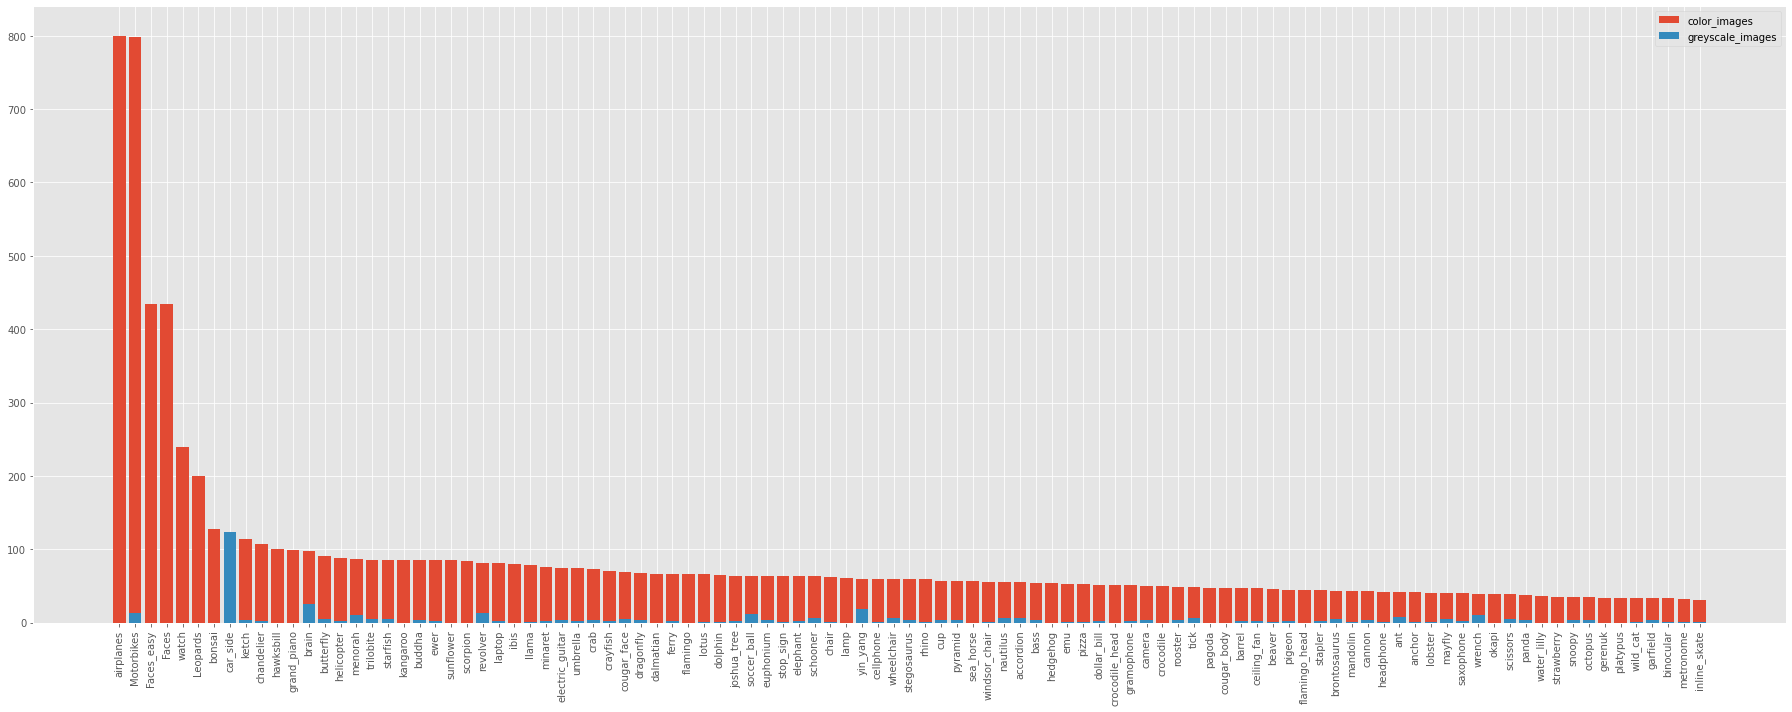

In [53]:

fig, axis = plt.subplots(figsize=(25,10))
axis.bar([x[0] for x in all_classes_grayscale], [x[2]+x[1] for x in all_classes_grayscale], label='color_images')
axis.bar([x[0] for x in all_classes_grayscale], [x[1] for x in all_classes_grayscale], label='greyscale_images')
axis.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/bw_class_dist.png')